# Module51-60
## 20200915-20200920

1. sklearn
1. graphviz
1. xgboost
1. lightgbm
1. tpot
1. mlbox
1. imbanlanced-learn
1. tsfresh
1. featuretools
1. networkx

## 6.51 sklearn

### Part1 Examples

In [3]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
X = [[ 1,  2,  3],  # 2 samples, 3 features
     [11, 12, 13]]
y = [0, 1]  # classes of each sample
clf.fit(X, y)
RandomForestClassifier(random_state=0)

RandomForestClassifier(random_state=0)

In [4]:
clf.predict(X)  # predict classes of the training data

clf.predict([[4, 5, 6], [14, 15, 16]])  # predict classes of new data


array([0, 1])

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# create a pipeline object
pipe = make_pipeline(
    StandardScaler(),
    LogisticRegression(random_state=0)
)
# load the iris dataset and split it into train and test sets
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# fit the whole pipeline
pipe.fit(X_train, y_train)

# we can now use it like any other estimator
accuracy_score(pipe.predict(X_test), y_test)


0.9736842105263158

In [11]:
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from scipy.stats import randint
X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# define the parameter space that will be searched over
param_distributions = {'n_estimators': randint(1, 5),
                        'max_depth': randint(5, 10)}

# now create a searchCV object and fit it to the data
search = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=0),
                             n_iter=5,
                             param_distributions=param_distributions,
                             random_state=0)
search.fit(X_train, y_train)
RandomizedSearchCV(estimator=RandomForestRegressor(random_state=0), n_iter=5,
                   param_distributions={'max_depth': ...,
                                        'n_estimators': ...},
                   random_state=0)
print(search.best_params_)
#{'max_depth': 9, 'n_estimators': 4}

# the search object now acts like a normal random forest estimator
# with max_depth=9 and n_estimators=4
search.score(X_test, y_test)


{'max_depth': 9, 'n_estimators': 4}


0.735363411343253

### Part2 各类算法工具导入

In [ ]:

# Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize=True)

# Logistic Regression
from sklearn.linear_model import LogisticRegression
clf_l1_LR = LogisticRegression(C=C, penalty='l1', tol=0.01, solver='saga')

# lasso
from sklearn.linear_model import lasso
ls = lasso(alpha=0.1)

# elastic-net
from sklearn.linear_model import ElasticNet
en = ElasticNet(alpha=0.1, l1_ratio=0.7)

# knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 5)

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

# svm
from sklearn.svm import SVC
svc = SVC(kernel='linear')

# cart
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

# randomforest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10)


# adab
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier(n_estimators=100)

# GBM
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
                                max_depth=1, random_state=0)

# kmeans
from sklearn.cluster import KMeans
km = kmeans = KMeans(n_clusters=2, random_state=0)

#DBSCAN
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=3, min_samples=2)

### Part3 cv

In [12]:
# train/test
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm

X, y = datasets.load_iris(return_X_y=True)
X.shape, y.shape


((150, 4), (150,))

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=0)

print(X_train.shape, y_train.shape)

print(X_test.shape, y_test.shape)


clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
clf.score(X_test, y_test)

(90, 4) (90,)
(60, 4) (60,)


0.9666666666666667

In [ ]:
# k-fold-CV

In [14]:
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(clf, X, y, cv=5)
scores


array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

In [ ]:
### Part4 模型评价

In [15]:
from sklearn.metrics import confusion_matrix
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]
confusion_matrix(y_true, y_pred)

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])

In [18]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_true, y_pred,target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.67      1.00      0.80         2
     class 1       0.00      0.00      0.00         1
     class 2       0.67      0.67      0.67         3

    accuracy                           0.67         6
   macro avg       0.44      0.56      0.49         6
weighted avg       0.56      0.67      0.60         6



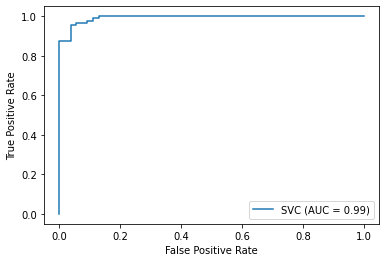

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import plot_roc_curve
from sklearn.datasets import load_wine
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
svc = SVC(random_state=42)
svc.fit(X_train, y_train)

svc_disp = plot_roc_curve(svc, X_test, y_test)

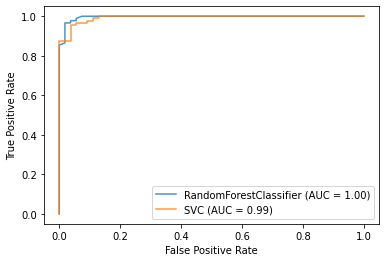

In [31]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer

X, y = load_breast_cancer(return_X_y=True)

rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

ax = plt.gca()
rfc_disp = plot_roc_curve(rfc, X_test, y_test, ax=ax, alpha=0.8)
svc_disp.plot(ax=ax, alpha=0.8)

---
## 6.52 grathviz

In [36]:
from sklearn import tree
X, y = load_iris(return_X_y=True)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

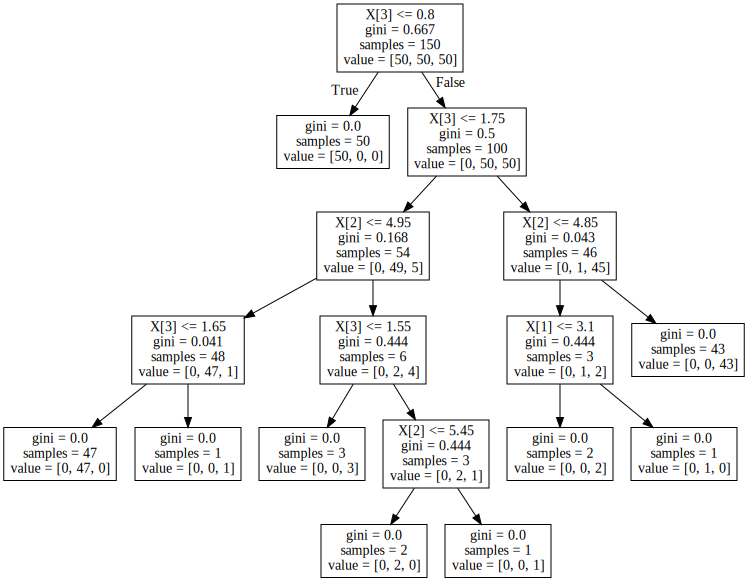

In [38]:
import graphviz 
from sklearn import tree
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph

---
## 6.53 xgboost

In [43]:
import pandas
import xgboost as xgb

X, y = datasets.load_iris(return_X_y=True)
dtrain = xgb.DMatrix(X, label=y)

In [48]:
print(y)

param = {'max_depth': 2, 'eta': 1, 'objective': 'multi:softmax','num_class':3}
evallist = [(dtrain, 'eval'), (dtrain, 'train')]
num_round = 10
bst = xgb.train(param, dtrain, num_round, evallist)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[0]	eval-merror:0.04000	train-merror:0.04000
[1]	eval-merror:0.03333	train-merror:0.03333
[2]	eval-merror:0.03333	train-merror:0.03333
[3]	eval-merror:0.02000	train-merror:0.02000
[4]	eval-merror:0.01333	train-merror:0.01333
[5]	eval-merror:0.01333	train-merror:0.01333
[6]	eval-merror:0.00667	train-merror:0.00667
[7]	eval-merror:0.00000	train-merror:0.00000
[8]	eval-merror:0.00000	train-merror:0.00000
[9]	eval-merror:0.00000	train-merror:0.00000


In [50]:

ypred1 = bst.predict(dtrain)
print(classification_report(y, ypred1))
ypred2 = bst.predict(dtrain, ntree_limit=bst.best_ntree_limit)
print(classification_report(y, ypred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



---
## 6.54 lightgbm


In [61]:
import lightgbm as gbm

X, y = datasets.load_iris(return_X_y=True)
dtrain = gbm.Dataset(X, label=y)

In [58]:
print(y)

param = {'max_depth': 2, 'eta': 1, 'objective': 'multiclass','num_class':3}
evallist = [(dtrain, 'eval'), (dtrain, 'train')]
num_round = 10
bst = gbm.train(param, dtrain, num_round)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.025723 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 98
[LightGBM] [Info] Number of data points in the train set: 150, number of used features: 4
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning]

In [71]:
ans = bst.predict(X, raw_score = True)
ypred1 = np.argmax(ans,axis = 1)
print(classification_report(y, ypred1))
ans = bst.predict(X, num_iteration = bst.best_iteration, raw_score = True)
ypred2 = np.argmax(ans,axis = 1)
print(classification_report(y, ypred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



---
## 6.55 tpot

In [73]:
from tpot import TPOTClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target,
                                                    train_size=0.75, test_size=0.25, random_state=42)

tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, random_state=42)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))


/usr/local/lib/python3.7/site-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")



Generation 1 - Current best internal CV score: 0.9866363761531047
Generation 2 - Current best internal CV score: 0.9866363761531047
Generation 3 - Current best internal CV score: 0.9866363761531047
Generation 4 - Current best internal CV score: 0.9866363761531047
Generation 5 - Current best internal CV score: 0.9881178576345864
Best pipeline: KNeighborsClassifier(MLPClassifier(input_matrix, alpha=0.1, learning_rate_init=0.1), n_neighbors=1, p=2, weights=uniform)
0.9844444444444445


In [81]:
tpot.export('tpot_digits_pipeline.py')
!cat tpot_digits_pipeline.py

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator
from tpot.export_utils import set_param_recursive

# NOTE: Make sure that the outcome column is labeled 'target' in the data file
tpot_data = pd.read_csv('PATH/TO/DATA/FILE', sep='COLUMN_SEPARATOR', dtype=np.float64)
features = tpot_data.drop('target', axis=1)
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['target'], random_state=42)

# Average CV score on the training set was: 0.9881178576345864
exported_pipeline = make_pipeline(
    StackingEstimator(estimator=MLPClassifier(alpha=0.1, learning_rate_init=0.1)),
    KNeighborsClassifier(n_neighbors=1, p=2, weights="uniform")
)
# Fix random state for all the steps in exported p

---
## 6.56 mlbox

In [83]:
from mlbox.preprocessing import *
from mlbox.optimisation import *
from mlbox.prediction import *

In [85]:
paths = ["./data/train.csv","./data/test.csv"]
target_name = "Survived"
rd = Reader(sep = ",")
df = rd.train_test_split(paths, target_name) 
dft = Drift_thresholder()
df = dft.fit_transform(df)   #removing non-stable features (like ID,...)
opt = Optimiser(scoring = "accuracy", n_folds = 5)
space = {
    
        'est__strategy':{"search":"choice",
                                  "space":["LightGBM"]},    
        'est__n_estimators':{"search":"choice",
                                  "space":[150]},    
        'est__colsample_bytree':{"search":"uniform",
                                  "space":[0.8,0.95]},
        'est__subsample':{"search":"uniform",
                                  "space":[0.8,0.95]},
        'est__max_depth':{"search":"choice",
                                  "space":[5,6,7,8,9]},
        'est__learning_rate':{"search":"choice",
                                  "space":[0.07]} 
    
        }

params = opt.optimise(space, df,15)
prd = Predictor()
prd.fit_predict(params, df)


reading csv : train.csv ...
cleaning data ...


TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.

The exit codes of the workers are {EXIT(1)}

---
## 6.57 imbalanced-learn

In [52]:
# Authors: Guillaume Lemaitre <g.lemaitre58@gmail.com>
# License: MIT

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons, make_blobs
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

from imblearn import FunctionSampler
from imblearn.pipeline import make_pipeline

print(__doc__)

rng = np.random.RandomState(42)


def plot_scatter(X, y, title):
    """Function to plot some data as a scatter plot."""
    plt.figure()
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label='Class #1')
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label='Class #0')
    plt.legend()
    plt.title(title)

Automatically created module for IPython interactive environment


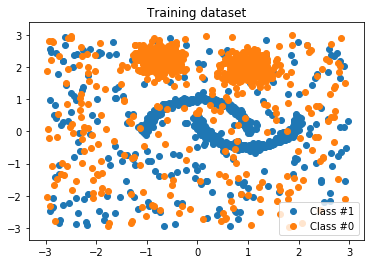

In [53]:
moons, _ = make_moons(n_samples=500, noise=0.05)
blobs, _ = make_blobs(n_samples=500, centers=[(-0.75, 2.25),
                                              (1.0, 2.0)],
                      cluster_std=0.25)
outliers = rng.uniform(low=-3, high=3, size=(500, 2))
X_train = np.vstack([moons, blobs, outliers])
y_train = np.hstack([np.ones(moons.shape[0], dtype=np.int8),
                     np.zeros(blobs.shape[0], dtype=np.int8),
                     rng.randint(0, 2, size=outliers.shape[0],
                                 dtype=np.int8)])

plot_scatter(X_train, y_train, 'Training dataset')

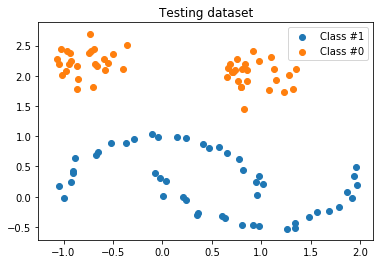

In [54]:
moons, _ = make_moons(n_samples=50, noise=0.05)
blobs, _ = make_blobs(n_samples=50, centers=[(-0.75, 2.25),
                                             (1.0, 2.0)],
                      cluster_std=0.25)
X_test = np.vstack([moons, blobs])
y_test = np.hstack([np.ones(moons.shape[0], dtype=np.int8),
                    np.zeros(blobs.shape[0], dtype=np.int8)])

plot_scatter(X_test, y_test, 'Testing dataset')

In [59]:
def outlier_rejection(X, y):
    """This will be our function used to resample our dataset."""
    model = IsolationForest(max_samples=100,
                            contamination=0.4,
                            random_state=rng)
    model.fit(X)
    y_pred = model.predict(X)
    return X[y_pred == 1], y[y_pred == 1]


reject_sampler = FunctionSampler(func=outlier_rejection)
print(reject_sampler.fit_resample)
X_inliers, y_inliers = reject_sampler.fit_resample(X_train, y_train)
plot_scatter(X_inliers, y_inliers, 'Training data without outliers')

<bound method FunctionSampler.fit_resample of FunctionSampler(accept_sparse=True,
                func=<function outlier_rejection at 0x7fd74bd18d90>,
                kw_args=None, validate=True)>


AttributeError: 'FunctionSampler' object has no attribute '_validate_data'

---
## 6.58 tsfresh

In [76]:
from tsfresh.examples.robot_execution_failures import load_robot_execution_failures
import os
timeseries, y = load_robot_execution_failures()

True


   id  time  F_x  F_y  F_z  T_x  T_y  T_z
0   1     0   -1   -1   63   -3   -1    0
1   1     1    0    0   62   -3   -1    0
2   1     2   -1   -1   61   -3    0    0
3   1     3   -1   -1   63   -2   -1    0
4   1     4   -1   -1   63   -3   -1    0


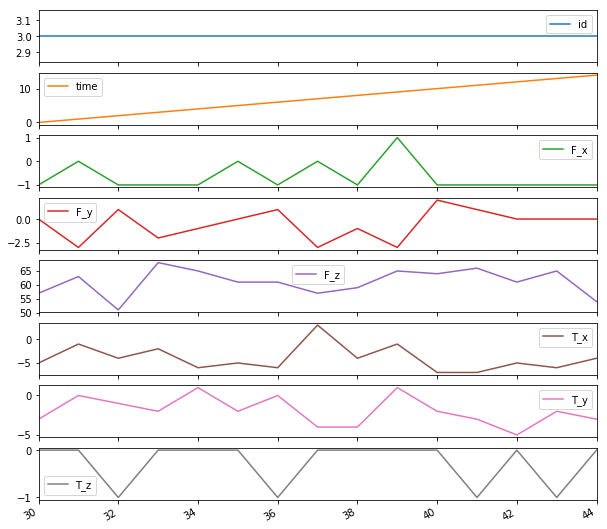

In [77]:
print(timeseries.head())
import matplotlib.pyplot as plt
timeseries[timeseries['id'] == 3].plot(subplots=True, sharex=True, figsize=(10,10))
plt.show()

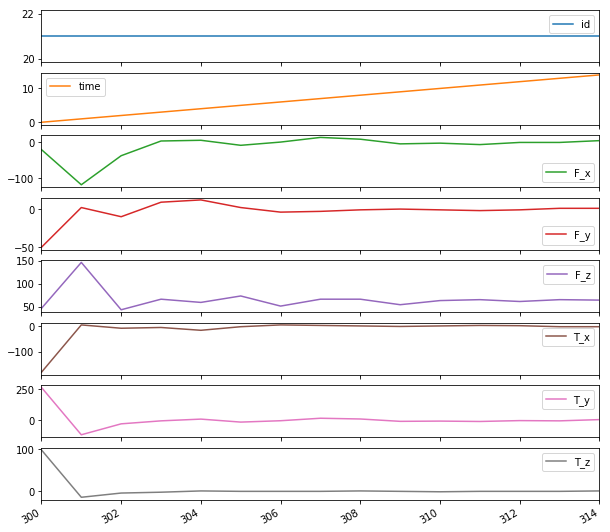

In [78]:
timeseries[timeseries['id'] == 21].plot(subplots=True, sharex=True, figsize=(10,10))
plt.show()

In [82]:
from tsfresh import extract_features
extracted_features = extract_features(timeseries, column_id="id", column_sort="time")
print(extracted_features)

Feature Extraction: 100%|██████████| 20/20 [00:07<00:00,  2.78it/s]


    F_x__variance_larger_than_standard_deviation  F_x__has_duplicate_max  \
1                                            0.0                     0.0   
2                                            0.0                     1.0   
3                                            0.0                     0.0   
4                                            0.0                     1.0   
5                                            0.0                     0.0   
..                                           ...                     ...   
84                                           1.0                     1.0   
85                                           1.0                     0.0   
86                                           1.0                     0.0   
87                                           1.0                     1.0   
88                                           1.0                     0.0   

    F_x__has_duplicate_min  F_x__has_duplicate  F_x__sum_values  \
1                   

In [80]:
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute

impute(extracted_features)
features_filtered = select_features(extracted_features, y)

/usr/local/lib/python3.7/site-packages/tsfresh/utilities/dataframe_functions.py:172: RuntimeWarning: The columns ['T_x__partial_autocorrelation__lag_7'
 'T_x__partial_autocorrelation__lag_8'
 'T_x__partial_autocorrelation__lag_9' ...
 'F_z__agg_linear_trend__attr_"stderr"__chunk_len_50__f_agg_"min"'
 'F_z__agg_linear_trend__attr_"stderr"__chunk_len_50__f_agg_"mean"'
 'F_z__agg_linear_trend__attr_"stderr"__chunk_len_50__f_agg_"var"'] did not have any finite values. Filling with zeros.
  df.iloc[:, np.where(is_col_non_finite)[0]].columns.values), RuntimeWarning)


In [83]:
from tsfresh import extract_relevant_features

features_filtered_direct = extract_relevant_features(timeseries, y,
                                                     column_id='id', column_sort='time')
print(features_filtered_direct)

Feature Extraction: 100%|██████████| 20/20 [00:06<00:00,  2.88it/s]


    F_x__value_count__value_-1  F_x__abs_energy  \
1                         14.0             14.0   
2                          7.0             25.0   
3                         11.0             12.0   
4                          5.0             16.0   
5                          9.0             17.0   
..                         ...              ...   
84                         0.0          96833.0   
85                         0.0           1683.0   
86                         0.0          83497.0   
87                         0.0        1405437.0   
88                         0.0           1427.0   

    F_x__range_count__max_1__min_-1  F_y__abs_energy  T_y__variance  \
1                              15.0             13.0       0.222222   
2                              13.0             76.0       4.222222   
3                              14.0             40.0       3.128889   
4                              10.0             60.0       7.128889   
5                              1

In [68]:
os.path.abspath('.')

'/data/python/tmp/ldw'

---
## 6.59 featuretools

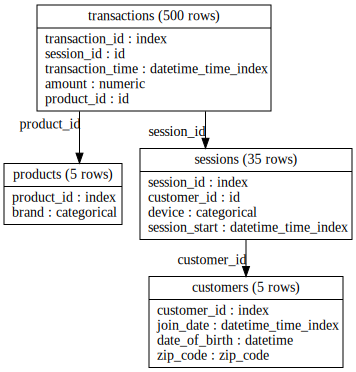

In [87]:
import featuretools as ft
es = ft.demo.load_mock_customer(return_entityset=True)
es.plot()

In [88]:
feature_matrix, features_defs = ft.dfs(entityset=es, target_entity="customers")
feature_matrix.head(5)

ImportError: cannot import name '_is_url' from 'pandas.io.common' (/usr/local/lib/python3.7/site-packages/pandas/io/common.py)

            zip_code  COUNT(sessions) MODE(sessions.device)  \
customer_id                                                   
5              60091                6                mobile   
4              60091                8                mobile   
1              60091                8                mobile   
3              13244                6               desktop   
2              13244                7               desktop   

             NUM_UNIQUE(sessions.device)  COUNT(transactions)  \
customer_id                                                     
5                                      3                   79   
4                                      3                  109   
1                                      3                  126   
3                                      3                   93   
2                                      3                   93   

             MAX(transactions.amount)  MEAN(transactions.amount)  \
customer_id                       

---
## 6.70 networkx

In [6]:
import pandas as pd
import networkx as nx
dat = pd.read_excel('./data/会员管理.xlsx')
dat[['会员名称','推荐人名称']].head()

,会员名称,推荐人名称
0,13048115250,厂家
1,15899960142,厂家
2,欢乐马,厂家
3,15718802126,厂家
4,16630504278,厂家


In [38]:
d1 = dat[['会员名称']].drop_duplicates()
d2 = dat[['推荐人名称']].drop_duplicates()
d2.columns = ['会员名称']
d_user = d1.append(d2)
d_user['idx1'] = range(d_user.shape[0])
d_user2 = d_user.copy(deep = True)
d_user2.columns = ['推荐人名称', 'idx2']
d_final = pd.merge(pd.merge(dat,d_user,on='会员名称'),d_user2,on='推荐人名称')
d_final

,会员Id,会员级别,会员名称,手机号码,推荐人名称,推荐人手机号码,加入时间,idx1,idx2
0,789,会员(2),13048115250,13048115250,厂家,NaN,2020-09-10 09:30:06,0,196
1,788,会员(2),15899960142,15899960142,厂家,NaN,2020-09-09 10:39:11,1,196
2,786,会员(2),欢乐马,15210127754,厂家,NaN,2020-09-07 15:31:34,2,196
3,785,会员(2),15718802126,15718802126,厂家,NaN,2020-09-06 09:33:39,3,196
4,784,会员(2),16630504278,16630504278,厂家,NaN,2020-09-06 09:22:29,4,196
...,...,...,...,...,...,...,...,...,...
360,587,会员plus(1),不靠谱,15811562021,征辉,1.860114e+10,2020-07-07 10:08:00,226,227
361,585,会员plus(1),李军艺,13661180188,尹沫儿/122,1.831012e+10,2020-07-07 10:08:00,149,150
362,585,会员plus(1),李军艺,13661180188,尹沫儿/122,1.831012e+10,2020-07-07 10:08:00,149,228
363,585,会员plus(1),李军艺,13661180188,尹沫儿/122,1.831012e+10,2020-07-07 10:08:00,214,150


Name: Graph from pandas adjacency matrix
Type: Graph
Number of nodes: 197
Number of edges: 197
Average degree:   2.0000


/usr/local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


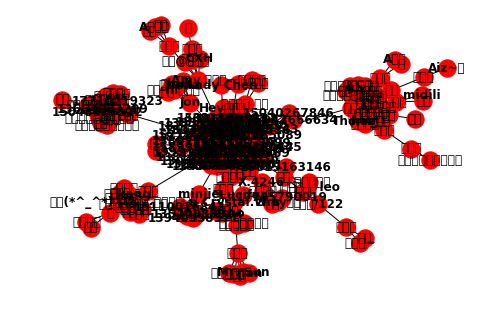

In [40]:
dt = dat[['会员名称','推荐人名称']]
dt.columns = ['source','target']
G = nx.from_pandas_edgelist(dt)
G.name = "Graph from pandas adjacency matrix"
print(nx.info(G))
nx.draw(G, with_labels=True, font_weight='bold')

In [50]:
for i in range(dat.shape[0]):
    opt = nx.all_simple_paths(G, source=dat['会员名称'][i], target='厂家')
    for path in opt:
        print(path)

['13048115250', '厂家']
['15899960142', '厂家']
['欢乐马', '厂家']
['15718802126', '厂家']
['16630504278', '厂家']
['15942666634', 'WPP', '厂家']
['18019262050', '厂家']
['13162583143', '厂家']
['追忆～～', '厂家']
['13439131567', '厂家']
['15901233969', '厂家']
['13331163900', '厂家']
['15011598741', '厂家']
['18211180623', '厂家']
['15011263457', '厂家']
['19921879620', '厂家']
['15040267846', 'WPP', '厂家']
['18019282050', '厂家']
['13311158999', '厂家']
['18819163146', '客服-小美', '厂家']
['JUNDY', '厂家']
['13810262910', '厂家']
['13714748752', '厂家']
['17745790019', 'X.4246', '厂家']
['13760736136', '厂家']
['13586331122', '厂家']
['15222510836', '厂家']
['小螺子', '厂家']
['18680472701', '厂家']
['15511111111', '厂家']
['13802947724', '厂家']
['Jack船长', '厂家']
['13853145111', '厂家']
['13926564226', '厂家']
['17710219323', '郭海文', '厂家']
['15048577522', '郭海文', '厂家']
['13664003209', '郭海文', '厂家']
['17777785089', '厂家']
['邓先彬 Jason', '厂家']
['13940358971', 'minjie', '厂家']
['15110016843', 'minjie', '厂家']
['13520988904', 'minjie', '厂家']
['13710260445', '厂家']
['1824

In [51]:
dir(opt)

['__class__',
 '__del__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__name__',
 '__ne__',
 '__new__',
 '__next__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'close',
 'gi_code',
 'gi_frame',
 'gi_running',
 'gi_yieldfrom',
 'send',
 'throw']